<a href="https://colab.research.google.com/github/lucaspinheiro27/MACHINE_LEARNING_DATA_SCIENCE/blob/main/PCA_Exerc%C3%ADcio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('/content/drive/MyDrive/FIAP/Machine Learning/Regressão - Casos Específicos/possum.csv')
df.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df1 = df.copy()

df1['sex'] = df1.apply(lambda row: 1 if row['sex'] == 'm' else 0, axis=1)
df1['Pop'] = df1.apply(lambda row: 1 if row['Pop'] == 'Vic' else 0, axis=1)
df1['site_1'] = df1.apply(lambda row: 1 if row['site'] == 1 else 0, axis=1)
df1['site_2'] = df1.apply(lambda row: 1 if row['site'] == 2 else 0, axis=1)
df1['site_3'] = df1.apply(lambda row: 1 if row['site'] == 3 else 0, axis=1)
df1['site_4'] = df1.apply(lambda row: 1 if row['site'] == 4 else 0, axis=1)
df1['site_5'] = df1.apply(lambda row: 1 if row['site'] == 5 else 0, axis=1)
df1['site_6'] = df1.apply(lambda row: 1 if row['site'] == 6 else 0, axis=1)
df1['site_7'] = df1.apply(lambda row: 1 if row['site'] == 7 else 0, axis=1)

features = ['site_1','site_2','site_3','site_4','site_5','site_6','site_7','Pop','sex','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']
target = 'age'


<Axes: >

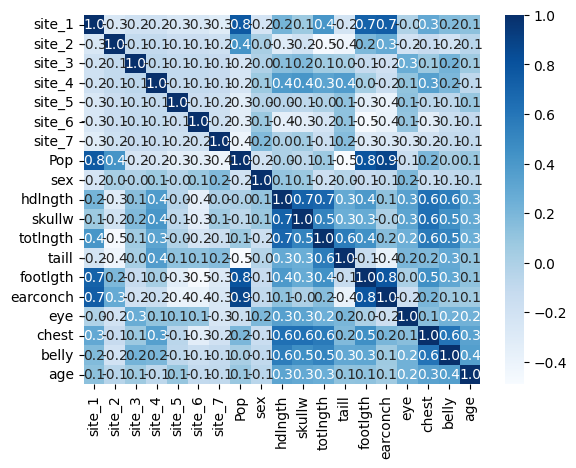

In [ ]:
sns.heatmap(df1[features+[target]].corr(), annot=True, fmt='.1f', cmap='Blues')


In [ ]:
def reglin_train_evaluate(df, features, target):
  df = df.dropna(subset=features)
  df = df.dropna(subset=target)
  x = df[features]
  y = df[[target]]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(x_train, y_train)

  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  print("R² treino: ", r2_score(y_train, y_train_pred))
  print("R² teste: ", r2_score(y_test, y_test_pred))

  coef_table = pd.DataFrame(list(x_train.columns)).copy()
  coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())
  print(coef_table)
features = ['hdlngth', 'skullw', 'taill', 'eye', 'chest', 'belly']
reglin_train_evaluate(df1, features, target)

R² treino:  0.1380330928762633
R² teste:  0.18993747023421326
         0     Coefs
0  hdlngth  0.059999
1   skullw  0.023785
2    taill -0.050213
3      eye  0.356687
4    chest  0.052454
5    belly  0.074941


In [ ]:
df1 = df1[features+[target]].dropna()
scaled_df = scale(df1[features])
components = len(features)
pca = PCA(n_components=components)
pca_df = pca.fit_transform(scaled_df)

columns = ['pca_comp_%i' % i for i in range(components)]
df_pca  = pd.DataFrame(pca_df, columns=columns, index=df1.index)
df_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5
0,1.394708,-0.720692,-0.386340,0.369198,-0.209443,0.838231
1,0.626613,0.069301,-0.728779,0.335751,0.635176,-0.123926
2,1.904815,0.100984,0.432524,-0.201111,0.917641,-0.057022
3,0.687312,0.126138,0.374338,0.302456,0.179542,-0.089892
4,0.000487,-0.578099,-0.259333,0.476105,0.569409,-0.176285


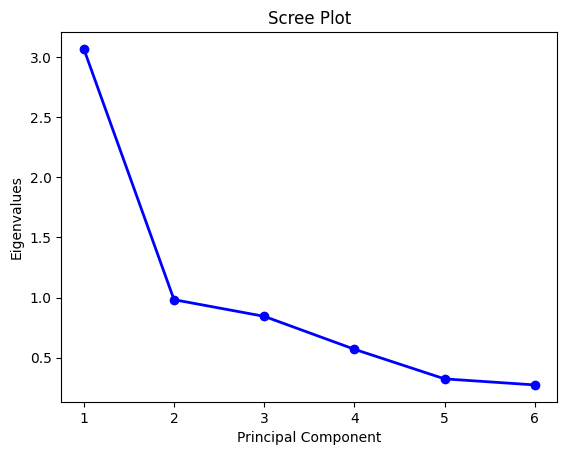

In [ ]:
# Método 1: Regra do cotovelo (ou joelho, depende do freguês)
# explicada para determinar a quantidade ótima de componentes

plt.plot(np.arange(pca.n_components_)+1, pca.explained_variance_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalues')
plt.show()

In [ ]:
# Método 2: Variância explicada para determinar a quantidade ótima de componentes

# variância explicada individual
print(pca.explained_variance_ratio_)

# variância explicada acumulada
np.cumsum(pca.explained_variance_ratio_)

[0.50649368 0.16205882 0.13919351 0.093973   0.05330029 0.0449807 ]


array([0.50649368, 0.6685525 , 0.80774601, 0.90171901, 0.9550193 ,
       1.        ])

In [ ]:
# Método 3: Verificação do número de componentes pelo autovalor
print(pca.explained_variance_)
print(pca.explained_variance_.sum())

[3.06905081 0.98198018 0.84342997 0.56942055 0.32296809 0.27255635]
6.059405940594057


In [ ]:
# instanciar o pca
components = 2
pca = PCA(n_components=components)

pca_retreinado = pca.fit_transform(scaled_df)
df_pca_retreinado = pd.DataFrame(pca_retreinado, columns=['PC1','PC2'], index=df1.index)
df_pca_retreinado


,PC1,PC2
0,1.394708,-0.720692
1,0.626613,0.069301
2,1.904815,0.100984
3,0.687312,0.126138
4,0.000487,-0.578099
...,...,...
99,-2.572224,0.832004
100,-1.351944,0.539684
101,-1.627002,-0.345806
102,-1.482248,0.692117


<Axes: >

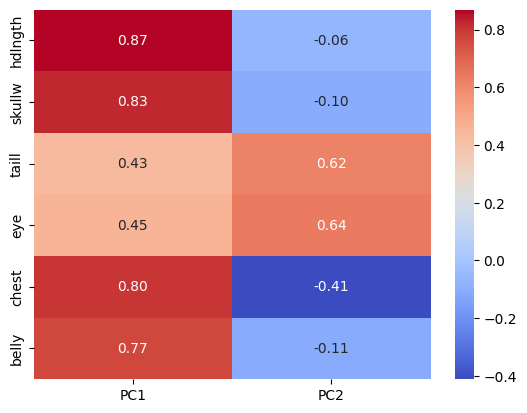

In [ ]:
cargas = pca.components_.T * np.sqrt(pca.explained_variance_)
componentes_cols = ['PC'+str(i) for i in range(1,components+1)]
df_cargas = pd.DataFrame(cargas, columns=componentes_cols, index=features)

# cargas grafico
sns.heatmap(df_cargas, annot=True, fmt='.2f', cmap='coolwarm')


<Axes: >

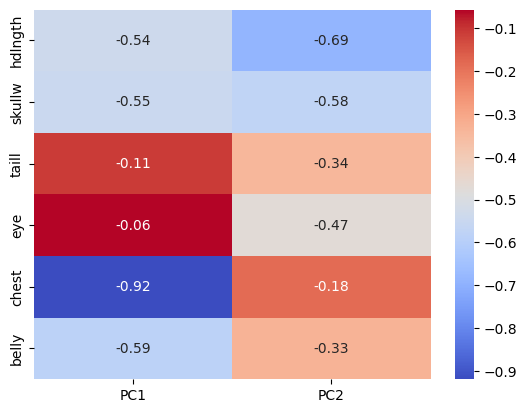

In [ ]:
fa = FactorAnalysis(n_components=components, rotation='varimax', svd_method='lapack')
trf_fa = fa.fit_transform(scaled_df)
cargas = fa.components_.T
componentes_cols = ['PC'+str(i) for i in range(1, components+1)]
df_cargas = pd.DataFrame(cargas, columns=componentes_cols, index=features)
sns.heatmap(df_cargas, annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
df_pca_retreinado_ = pd.concat([df1, df_pca_retreinado], axis=1)
df_pca_retreinado_


,hdlngth,skullw,taill,eye,chest,belly,age,PC1,PC2
0,94.1,60.4,36.0,15.2,28.0,36.0,8.0,1.394708,-0.720692
1,92.5,57.6,36.5,16.0,28.5,33.0,6.0,0.626613,0.069301
2,94.0,60.0,39.0,15.5,30.0,34.0,6.0,1.904815,0.100984
3,93.2,57.1,38.0,15.2,28.0,34.0,6.0,0.687312,0.126138
4,91.5,56.3,36.0,15.1,28.5,33.0,2.0,0.000487,-0.578099
...,...,...,...,...,...,...,...,...,...
99,89.5,56.0,36.5,14.8,23.0,27.0,1.0,-2.572224,0.832004
100,88.6,54.7,39.0,14.0,25.0,33.0,1.0,-1.351944,0.539684
101,92.4,55.0,38.0,13.0,25.0,30.0,6.0,-1.627002,-0.345806
102,91.5,55.2,36.5,15.4,25.0,29.0,4.0,-1.482248,0.692117


In [ ]:
reglin_train_evaluate(df_pca_retreinado_, ['PC1', 'PC2'], target)

R² treino:  0.11018906437841991
R² teste:  0.23743437108665866
     0     Coefs
0  PC1  0.340922
1  PC2  0.095853
